In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Model without 1st ReLu, all todevices, logits passed to softmax before computing AUC scores

##### Dropout = 0.5, weight_decay = 5e-4

In [3]:
history_csv = "./previousModel/model_fdset_30Mar/history.csv"

In [5]:
history_df = pd.read_csv(history_csv)
history_df

,epoch,train_loss,valid_loss,lr,AUC_class1,AUC_class2,AUC_class3,AP_class1,AP_class2,AP_class3,AUC_3to1,AP_3to1
0,0.0,0.018172,0.045546,0.00100,0.942603,0.982759,0.755479,0.992577,0.783609,0.056852,0.799221,0.122644
1,1.0,0.008288,0.043033,0.00100,0.944579,0.986833,0.754312,0.992611,0.830216,0.053759,0.793730,0.127755
2,2.0,0.007953,0.046328,0.00100,0.943258,0.986213,0.715039,0.992353,0.826090,0.047738,0.790186,0.121742
3,3.0,0.007850,0.041683,0.00100,0.946169,0.987455,0.756581,0.992909,0.845525,0.063034,0.805079,0.144270
4,4.0,0.007830,0.041720,0.00100,0.944014,0.987764,0.750777,0.992413,0.858189,0.062459,0.793189,0.143040
...,...,...,...,...,...,...,...,...,...,...,...,...
65,65.0,0.005806,0.033563,0.00001,0.961153,0.994202,0.821051,0.995198,0.937317,0.096538,0.851106,0.230141
66,66.0,0.005792,0.033432,0.00001,0.961201,0.994359,0.821690,0.995208,0.938362,0.098173,0.851243,0.231704
67,67.0,0.005785,0.033383,0.00001,0.961249,0.994324,0.822373,0.995174,0.939246,0.099029,0.851614,0.232129
68,68.0,0.005764,0.033543,0.00001,0.961227,0.994210,0.822950,0.995148,0.938583,0.098298,0.852244,0.230431


In [6]:
# %pwd

In [7]:
# print the epoch number, training loss, validation loss and learning rate

for index, row in history_df.iterrows():
    print(f"epoch {int(row['epoch']) :3d}:  training loss {row['train_loss']:6.3f}  " \
            f"validation loss {row['valid_loss']:6.3f}  " \
            f"learning rate {row['lr']:10.7f} ")
    #print(f"epoch {int(row['epoch']) :4d}")

epoch   0:  training loss  0.018  validation loss  0.046  learning rate  0.0010000 
epoch   1:  training loss  0.008  validation loss  0.043  learning rate  0.0010000 
epoch   2:  training loss  0.008  validation loss  0.046  learning rate  0.0010000 
epoch   3:  training loss  0.008  validation loss  0.042  learning rate  0.0010000 
epoch   4:  training loss  0.008  validation loss  0.042  learning rate  0.0010000 
epoch   5:  training loss  0.008  validation loss  0.044  learning rate  0.0010000 
epoch   6:  training loss  0.008  validation loss  0.042  learning rate  0.0010000 
epoch   7:  training loss  0.008  validation loss  0.043  learning rate  0.0010000 
epoch   8:  training loss  0.008  validation loss  0.044  learning rate  0.0010000 
epoch   9:  training loss  0.008  validation loss  0.041  learning rate  0.0010000 
epoch  10:  training loss  0.008  validation loss  0.041  learning rate  0.0010000 
epoch  11:  training loss  0.008  validation loss  0.044  learning rate  0.0

In [8]:
# print the epoch number, validation loss and AUC-Score for each class

for index, row in history_df.iterrows():
    print(f"epoch {int(row['epoch']):3d}:  validation loss {row['valid_loss']:6.3f}  " \
            f"AUC class_1 {row['AUC_class1']:6.3f}  " \
            f"AUC class_2 {row['AUC_class2']:6.3f}  " \
            f"AUC class_3 {row['AUC_class3']:6.3f}")

epoch   0:  validation loss  0.046  AUC class_1  0.943  AUC class_2  0.983  AUC class_3  0.755
epoch   1:  validation loss  0.043  AUC class_1  0.945  AUC class_2  0.987  AUC class_3  0.754
epoch   2:  validation loss  0.046  AUC class_1  0.943  AUC class_2  0.986  AUC class_3  0.715
epoch   3:  validation loss  0.042  AUC class_1  0.946  AUC class_2  0.987  AUC class_3  0.757
epoch   4:  validation loss  0.042  AUC class_1  0.944  AUC class_2  0.988  AUC class_3  0.751
epoch   5:  validation loss  0.044  AUC class_1  0.940  AUC class_2  0.986  AUC class_3  0.744
epoch   6:  validation loss  0.042  AUC class_1  0.939  AUC class_2  0.986  AUC class_3  0.732
epoch   7:  validation loss  0.043  AUC class_1  0.945  AUC class_2  0.988  AUC class_3  0.759
epoch   8:  validation loss  0.044  AUC class_1  0.943  AUC class_2  0.987  AUC class_3  0.726
epoch   9:  validation loss  0.041  AUC class_1  0.946  AUC class_2  0.988  AUC class_3  0.762
epoch  10:  validation loss  0.041  AUC class_1  0

In [9]:
# print the epoch number, validation loss, AUC-Score for classes 3 vs 1  and AP-Score for classes 3 vs 1

for index, row in history_df.iterrows():
    print(f"epoch {int(row['epoch']):3d}:  validation loss {row['valid_loss']:6.3f}  " \
            f"AUC 3 to 1 {row['AUC_3to1']:6.3f}  " \
            f"AP 3 to 1 {row['AP_3to1']:6.3f}  ")

epoch   0:  validation loss  0.046  AUC 3 to 1  0.799  AP 3 to 1  0.123  
epoch   1:  validation loss  0.043  AUC 3 to 1  0.794  AP 3 to 1  0.128  
epoch   2:  validation loss  0.046  AUC 3 to 1  0.790  AP 3 to 1  0.122  
epoch   3:  validation loss  0.042  AUC 3 to 1  0.805  AP 3 to 1  0.144  
epoch   4:  validation loss  0.042  AUC 3 to 1  0.793  AP 3 to 1  0.143  
epoch   5:  validation loss  0.044  AUC 3 to 1  0.783  AP 3 to 1  0.124  
epoch   6:  validation loss  0.042  AUC 3 to 1  0.779  AP 3 to 1  0.135  
epoch   7:  validation loss  0.043  AUC 3 to 1  0.794  AP 3 to 1  0.145  
epoch   8:  validation loss  0.044  AUC 3 to 1  0.794  AP 3 to 1  0.137  
epoch   9:  validation loss  0.041  AUC 3 to 1  0.799  AP 3 to 1  0.144  
epoch  10:  validation loss  0.041  AUC 3 to 1  0.798  AP 3 to 1  0.143  
epoch  11:  validation loss  0.044  AUC 3 to 1  0.789  AP 3 to 1  0.143  
epoch  12:  validation loss  0.042  AUC 3 to 1  0.799  AP 3 to 1  0.141  
epoch  13:  validation loss  0.041  AU

In [10]:
# print the epoch number, validation loss and Average Precision for each class

for index, row in history_df.iterrows():
    print(f"epoch {int(row['epoch']):3d}:  validation loss {row['valid_loss']:6.3f}  " \
            f"AP class_1 {row['AP_class1']:6.3f}  " \
            f"AP class_2 {row['AP_class2']:6.3f}  " \
            f"AP class_3 {row['AP_class3']:6.3f}")

epoch   0:  validation loss  0.046  AP class_1  0.993  AP class_2  0.784  AP class_3  0.057
epoch   1:  validation loss  0.043  AP class_1  0.993  AP class_2  0.830  AP class_3  0.054
epoch   2:  validation loss  0.046  AP class_1  0.992  AP class_2  0.826  AP class_3  0.048
epoch   3:  validation loss  0.042  AP class_1  0.993  AP class_2  0.846  AP class_3  0.063
epoch   4:  validation loss  0.042  AP class_1  0.992  AP class_2  0.858  AP class_3  0.062
epoch   5:  validation loss  0.044  AP class_1  0.991  AP class_2  0.813  AP class_3  0.050
epoch   6:  validation loss  0.042  AP class_1  0.991  AP class_2  0.852  AP class_3  0.059
epoch   7:  validation loss  0.043  AP class_1  0.992  AP class_2  0.855  AP class_3  0.060
epoch   8:  validation loss  0.044  AP class_1  0.992  AP class_2  0.842  AP class_3  0.056
epoch   9:  validation loss  0.041  AP class_1  0.993  AP class_2  0.865  AP class_3  0.060
epoch  10:  validation loss  0.041  AP class_1  0.993  AP class_2  0.865  AP cla

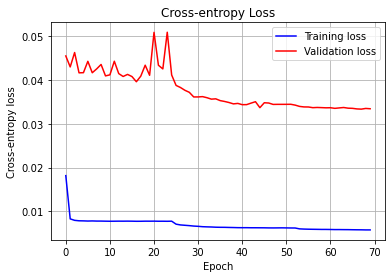

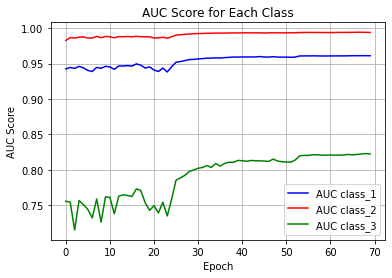

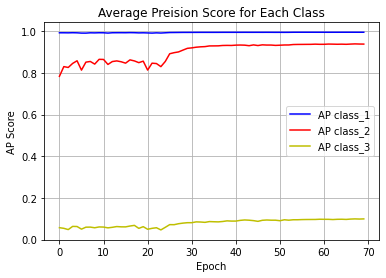

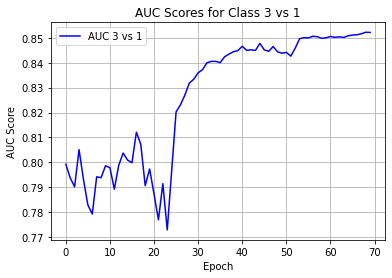

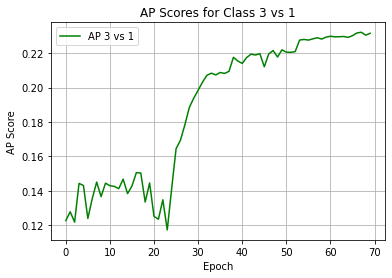

In [11]:
# plot the cross-entropy

plt.plot(history_df["epoch"], history_df["train_loss"], 'b-', label='Training loss')
plt.plot(history_df["epoch"], history_df["valid_loss"], 'r-', label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Cross-entropy loss')
#plt.ylim([0, min(test_crossentropy) * 3])
plt.title('Cross-entropy Loss')
plt.grid(True)
plt.legend(loc='best')
plt.show()

# plot the AUC Score

plt.plot(history_df["epoch"], history_df["AUC_class1"], 'b-', label='AUC class_1')
plt.plot(history_df["epoch"], history_df["AUC_class2"], 'r-', label='AUC class_2')
plt.plot(history_df["epoch"], history_df["AUC_class3"], 'g-', label='AUC class_3')
plt.xlabel('Epoch')
plt.ylabel('AUC Score')
#plt.ylim([max(1 - (1 - test_accuracy[-1]) * 2, 0), 1])
plt.title('AUC Score for Each Class')
plt.grid(True)
plt.legend(loc='best')
plt.show()

# plot the Average Preision Score

plt.plot(history_df["epoch"], history_df["AP_class1"], 'b-', label='AP class_1')
plt.plot(history_df["epoch"], history_df["AP_class2"], 'r-', label='AP class_2')
plt.plot(history_df["epoch"], history_df["AP_class3"], 'y-', label='AP class_3')
plt.xlabel('Epoch')
plt.ylabel('AP Score')
#plt.ylim([max(1 - (1 - test_accuracy[-1]) * 2, 0), 1])
plt.title('Average Preision Score for Each Class')
plt.grid(True)
plt.legend(loc='best')
plt.show()


# plot the AUC Scores class 3 vs 1

plt.plot(history_df["epoch"], history_df["AUC_3to1"], 'b-', label='AUC 3 vs 1')
#plt.plot(history_df["epoch"], history_df["AUC_1to3"], 'r-', label='AUC 1 vs 3')
plt.xlabel('Epoch')
plt.ylabel('AUC Score')
#plt.ylim([max(1 - (1 - test_accuracy[-1]) * 2, 0), 1])
plt.title('AUC Scores for Class 3 vs 1')
plt.grid(True)
plt.legend(loc='best')
plt.show()

# plot the AP Scores class 3 vs 1

plt.plot(history_df["epoch"], history_df["AP_3to1"], 'g-', label='AP 3 vs 1')

plt.xlabel('Epoch')
plt.ylabel('AP Score')
#plt.ylim([max(1 - (1 - test_accuracy[-1]) * 2, 0), 1])
plt.title('AP Scores for Class 3 vs 1')
plt.grid(True)
plt.legend(loc='best')
plt.show()